In [9]:
#Dependencies
import pandas as pd
import numpy as np
import json
import requests
from pprint import pprint
import csv
import matplotlib.pyplot as plt

In [10]:
import os

In [11]:
df = pd.read_csv("chi_stat_data.csv")

In [6]:
df

,Community Area Number,Community Area Name,Population,Non Family Households,No Highschool Education,Never Married,Median Income,Population1
0,1,Rogers Park,52000,0.59,0.13,0.55,39468,52000
1,2,West Ridge,19267,0.19,0.04,0.25,103473,19267
2,3,Uptown,67634,0.68,0.09,0.57,44819,67634
3,4,Lincoln Square,80080,0.43,0.17,0.47,52139,80080
4,5,North Center,139945,0.56,0.09,0.50,62234,139945
5,6,Lake View,117565,0.74,0.03,0.60,70332,117565
6,7,Lincoln Park,65307,0.70,0.03,0.57,84430,65307
7,8,Near North Side,80870,0.73,0.01,0.49,82857,80870
8,9,Edison Park,28330,0.39,0.07,0.32,73591,28330
9,10,Norwood Park,54266,0.35,0.06,0.32,74402,54266


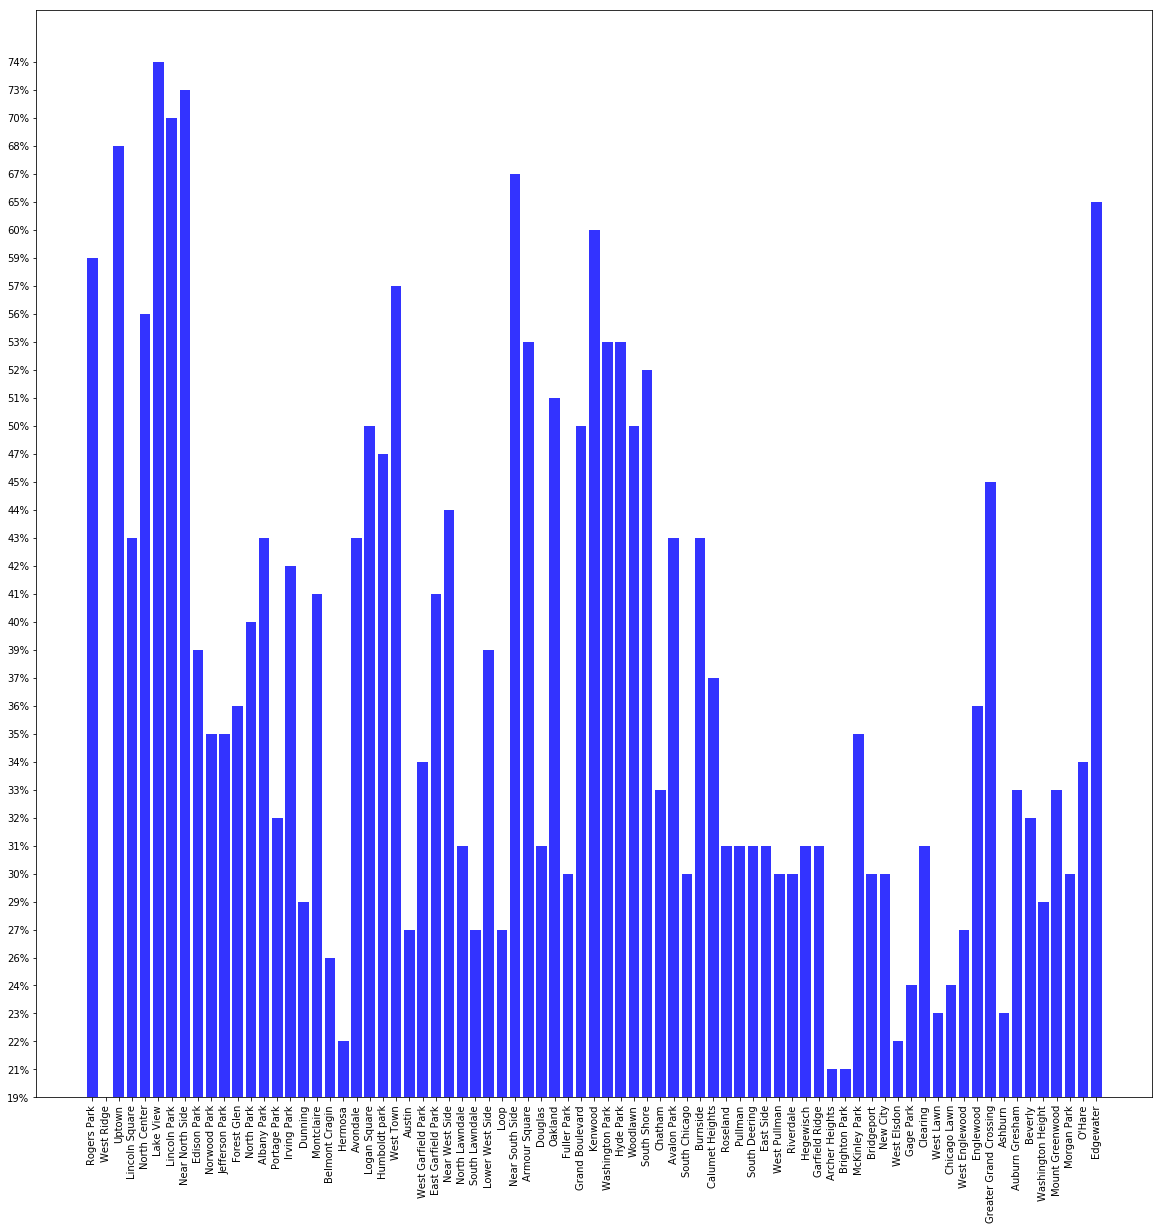

In [12]:
plt.figure(figsize=(20,20))
Population = df.loc[:,"Non Family Households"]
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df["Non Family Households"], color='b', alpha=0.80, align="center")
plt.xticks(tick_locations, df["Community Area Name"], rotation="vertical")
plt.show()

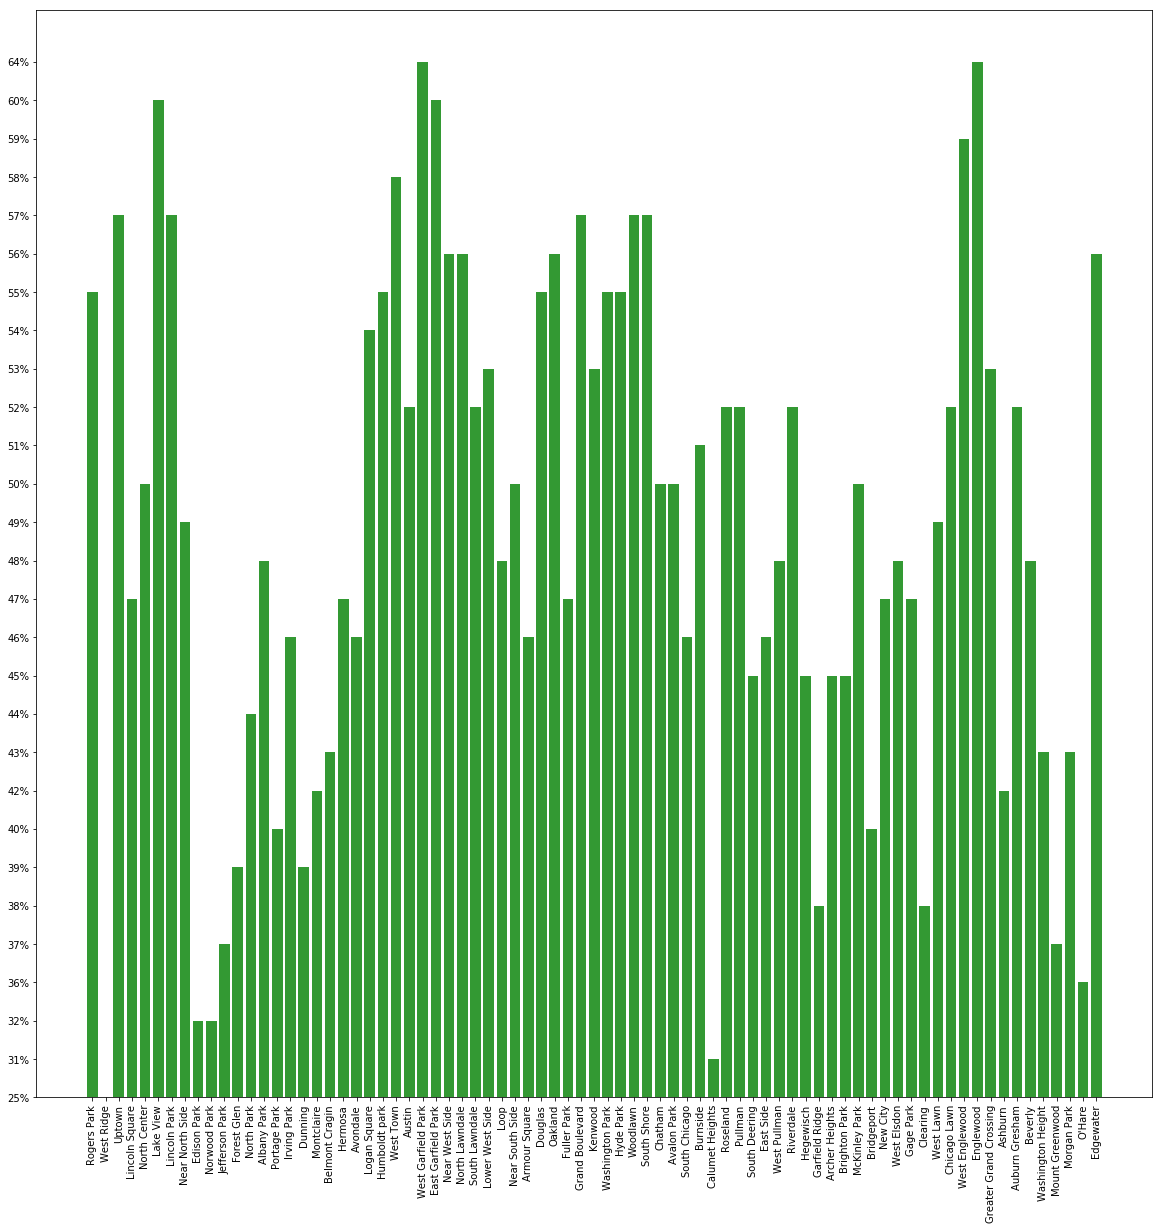

In [13]:
plt.figure(figsize=(20,20))
Population = df.loc[:,"Never Married"]
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df["Never Married"], color='g', alpha=0.80, align="center")
plt.xticks(tick_locations, df["Community Area Name"], rotation="vertical")
plt.show()

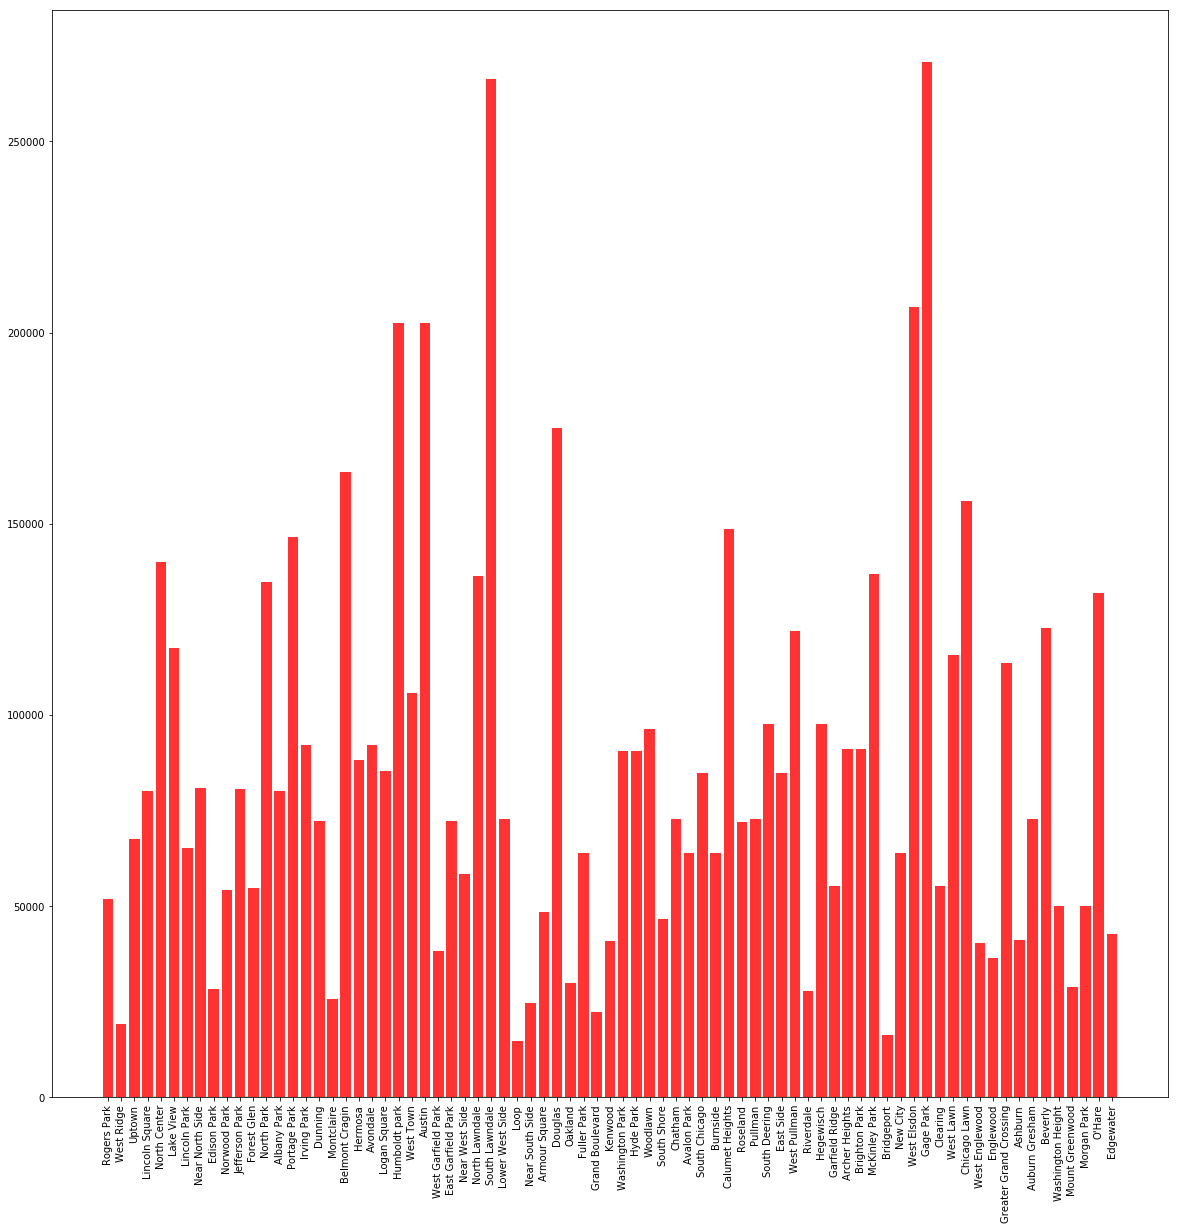

In [14]:
plt.figure(figsize=(20,20))
Population = df.loc[:,"Population"]
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df["Population"], color='r', alpha=0.80, align="center")
plt.xticks(tick_locations, df["Community Area Name"], rotation="vertical")
plt.show()

In [168]:
# reading csv file into a pandas data frame
# crime_data_2013 = pd.read_csv("Resources/Crimes_-_2013.csv")
# crime_data_2014 = pd.read_csv("Resources/Crimes_-_2014.csv")
# crime_data_2015 = pd.read_csv("Resources/Crimes_-_2015.csv")
# crime_data_2016 = pd.read_csv("Resources/Crimes_-_2016.csv")
# crime_data_2017 = pd.read_csv("Resources/Crimes_-_2017.csv")
# crime_data_2018 = pd.read_csv("Resources/Crimes_-_2018.csv")
# stat_data = pd.read_csv("Chi_stat_data1.csv")

In [ ]:
plt.figure(figsize=(20,20))
Population = df.loc[:,"Median Income"]
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, df["Median Income"], color='b', alpha=0.80, align="center")
plt.xticks(tick_locations, df["Community Area Name"], rotation="vertical")
plt.show()

In [169]:
# stat_data

,Community Area Number,COMMUNITY AREA NAME,Population,Non Family Households,No Highschool Education,Never Married,Median Income
0,1,Rogers Park,52000,59%,13%,55%,"39,468"
1,2,West Ridge,"19,267",19%,4%,25%,"103,473"
2,3,Uptown,67634,68%,9%,57%,"44,819"
3,4,Lincoln Square,80080,43%,17%,47%,"52,139"
4,5,North Center,"139,945",56%,9%,50%,"62,234"
5,6,Lake View,117565,74%,3%,60%,"70,332"
6,7,Lincoln Park,65307,70%,3%,57%,"84,430"
7,8,Near North Side,"80,870",73%,1%,49%,"82,857"
8,9,Edison Park,"28,330",39%,7%,32%,"73,591"
9,10,Norwood Park,"54,266",35%,6%,32%,"74,402"


In [31]:
#Combine Crime Data
crime_data = [crime_data_2013,crime_data_2014,crime_data_2015,crime_data_2016,crime_data_2017]
crime_data = pd.concat(crime_data,axis = 0)
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11227517,JB138481,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,6.0,69.0,02,NaN,NaN,2013,02/11/2018 03:57:41 PM,NaN,NaN,NaN
1,11042141,JA376559,05/16/2013 12:00:00 AM,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2,11042759,JA376850,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,48.0,77.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
3,11042911,JA376915,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,...,47.0,5.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
4,9087757,HW232654,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,False,...,44.0,6.0,02,1169041.0,1921593.0,2013,02/12/2018 03:46:59 PM,41.940371,-87.654122,"(41.940370659, -87.654122097)"


In [32]:
#Education Data
stat_data_clean = stat_data.rename(columns={"Community Area Number":"Community Area"})
#Show Columns
stat_data_clean.head()

,Community Area,COMMUNITY AREA NAME,Population,Non Family Households,No Highschool Education,Never Married,Median Income,Square Miles
0,1,Rogers Park,52000,59%,13%,55%,39468,0.823
1,2,West Ridge,19267,19%,4%,25%,103473,3.487
2,3,Uptown,67634,68%,9%,57%,44819,2.333
3,4,Lincoln Square,80080,43%,17%,47%,52139,1.591
4,5,North Center,139945,56%,9%,50%,62234,1.126


In [33]:
# narrowing the table to relevant fields, still have to decide which one to use to be the geographical reference
crime_geo_data = crime_data[["Date", "Block", "Primary Type", "District", "Ward", "Community Area", "Latitude", "Longitude", "Year"]]
crime_geo_data.head()

,Date,Block,Primary Type,District,Ward,Community Area,Latitude,Longitude,Year
0,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,CRIM SEXUAL ASSAULT,7.0,6.0,69.0,NaN,NaN,2013
1,05/16/2013 12:00:00 AM,003XX W 64TH ST,DECEPTIVE PRACTICE,7.0,20.0,68.0,NaN,NaN,2013
2,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,DECEPTIVE PRACTICE,20.0,48.0,77.0,NaN,NaN,2013
3,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,DECEPTIVE PRACTICE,19.0,47.0,5.0,NaN,NaN,2013
4,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,CRIM SEXUAL ASSAULT,19.0,44.0,6.0,41.940371,-87.654122,2013


In [34]:
#Check to make sure all data is there
crime_geo_data.groupby("Year").count()

,Date,Block,Primary Type,District,Ward,Community Area,Latitude,Longitude
Year,,,,,,,,
2013,306934,306934,306934,306934,306931,306930,306342,306342
2014,275024,275024,275024,275024,275022,275024,273714,273714
2015,263727,263727,263727,263727,263725,263727,257890,257890
2016,268574,268574,268574,268574,268574,268574,267229,267229
2017,267179,267179,267179,267178,267178,267179,265041,265041


In [35]:
#Groupy by type of crime
crime_type = crime_data.groupby(["Primary Type"]).count()
crime_type.head()

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,...,2173,2173,2173,2171,2171,2173,2173,2171,2171,2171
ASSAULT,89940,89940,89940,89940,89940,89940,89940,89940,89940,89940,...,89939,89940,89940,89822,89822,89940,89940,89822,89822,89822
BATTERY,251856,251856,251856,251856,251856,251856,251855,251856,251856,251856,...,251856,251856,251856,251621,251621,251856,251856,251621,251621,251621
BURGLARY,72927,72927,72927,72927,72927,72927,72925,72927,72927,72927,...,72927,72927,72927,72786,72786,72927,72927,72786,72786,72786
CONCEALED CARRY LICENSE VIOLATION,154,154,154,154,154,154,154,154,154,154,...,154,154,154,153,153,154,154,153,153,153


In [36]:
#Merge Crime Data & Stat Data
#Combine Data
frames = [crime_data, stat_data_clean]
cs_df = crime_data.merge(stat_data_clean, on='Community Area', how='left')
cs_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,COMMUNITY AREA NAME,Population,Non Family Households,No Highschool Education,Never Married,Median Income,Square Miles
0,11227517,JB138481,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,NaN,NaN,NaN,Greater Grand Crossing,113708.0,45%,5%,53%,31701.0,3.555
1,11042141,JA376559,05/16/2013 12:00:00 AM,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,NaN,NaN,NaN,Englewood,36568.0,36%,7%,64%,20133.0,3.049
2,11042759,JA376850,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,Edgewater,42614.0,65%,5%,56%,40363.0,1.703
3,11042911,JA376915,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,...,NaN,NaN,NaN,North Center,139945.0,56%,9%,50%,62234.0,1.126
4,9087757,HW232654,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,False,...,41.940371,-87.654122,"(41.940370659, -87.654122097)",Lake View,117565.0,74%,3%,60%,70332.0,3.143
5,11043823,JA378025,08/11/2013 05:00:00 PM,004XX N CLARK ST,0820,THEFT,$500 AND UNDER,RESTAURANT,False,False,...,NaN,NaN,NaN,Near North Side,80870.0,73%,1%,49%,82857.0,2.702
6,11029462,JA361647,07/01/2013 12:00:00 PM,060XX N ALBANY AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,West Ridge,19267.0,19%,4%,25%,103473.0,3.487
7,11029532,JA361567,12/01/2013 09:00:00 PM,021XX N MULLIGAN AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,True,...,NaN,NaN,NaN,Belmont Cragin,163584.0,26%,22%,43%,50210.0,3.906
8,11044965,JA379380,06/28/2013 12:00:00 PM,020XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,Logan Square,85319.0,50%,15%,54%,48653.0,2.563
9,11228666,JB149148,01/01/2013 12:01:00 AM,060XX W BYRON ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,VEHICLE NON-COMMERCIAL,False,False,...,NaN,NaN,NaN,Dunning,72272.0,29%,16%,39%,59004.0,3.717


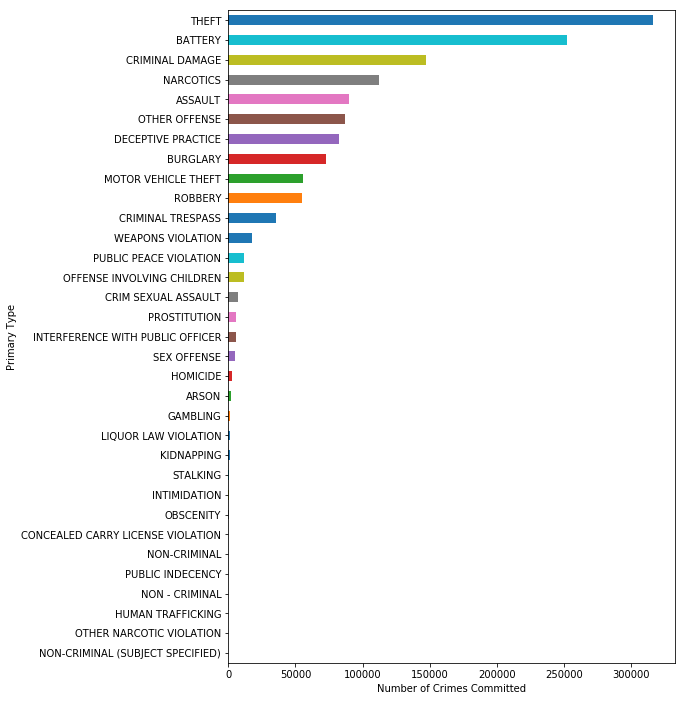

In [66]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
cs_df.groupby(cs_df['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

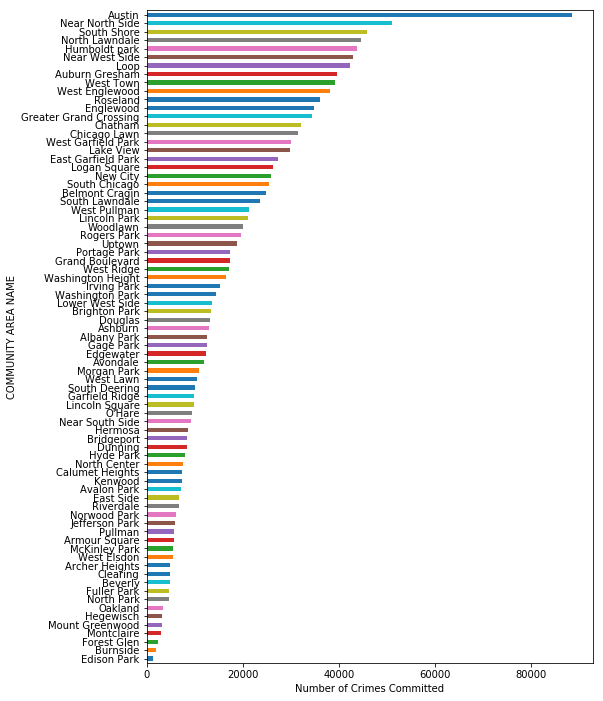

In [40]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
tick_locations = [value+0.4 for value in x_axis]

cs_df.groupby(cs_df['COMMUNITY AREA NAME']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()